<a href="https://colab.research.google.com/github/xihaad/Bengali_Cyber_Bullying/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd


df = pd.read_excel('/content/drive/MyDrive/Cyber Bulling_nlp/CyberBulling_Dataset_Bangla.xlsx')

In [4]:
df.head(10)

,Unnamed: 0,Description,Label
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,sexual
2,2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,sexual
3,3,বোকাচোদা একটা।,sexual
4,4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,sexual
5,5,বাংলাদেশ ফেসবুক ইজ বিনোদন,sexual
6,6,ক্ষমা করার মালিক উপরওয়ালা। উনি ক্ষমা করে দিলে ...,sexual
7,7,আপনি ক্ষমা চেয়েছেন। এটাই বড় কথা।ক্ষমা করার মাল...,sexual
8,8,নিজের রিভিউ বারানোর জন্যই জতো সব নাটক? ফালতু.....,sexual
9,9,আপনাদের সকলের কাছে একটা বিষয়ে অনুরোধ-দয়াকরে এই...,sexual


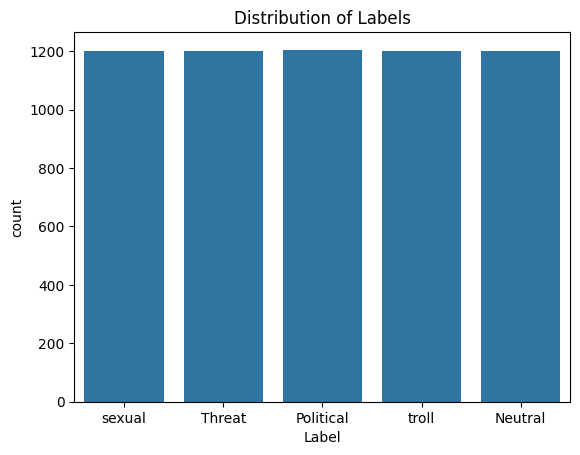

In [5]:
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.show()




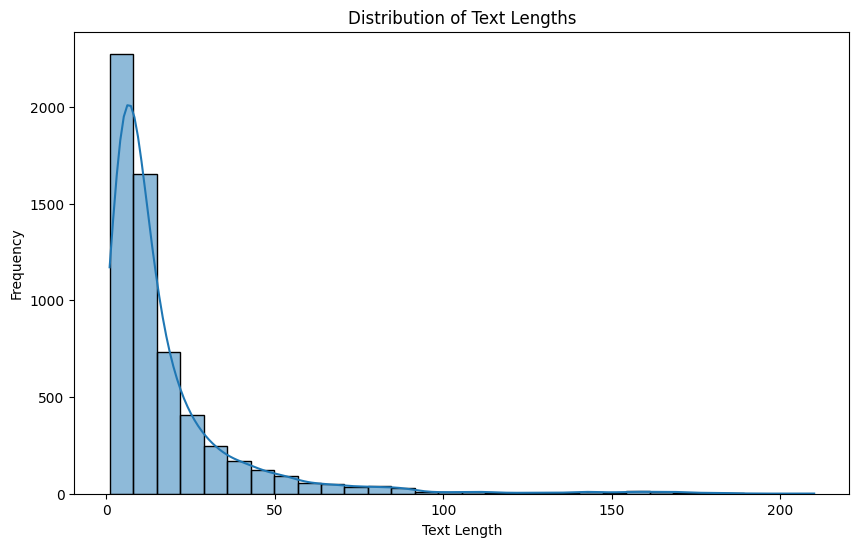

In [6]:
# text lengths
df['Text_Length'] = df['Description'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()



In [7]:
!pip install  wordcloud

In [8]:
!pip install python-bidi


In [9]:
!pip install nltk


In [10]:
!pip install arabic_reshaper

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


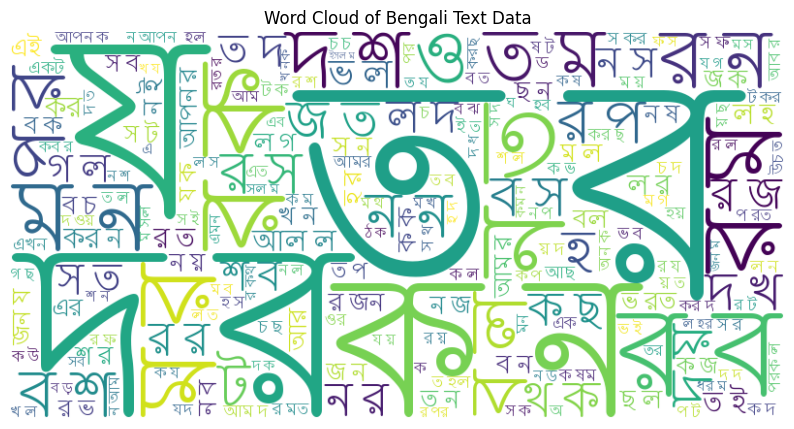

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from bidi.algorithm import get_display
from nltk import word_tokenize
from nltk.corpus import stopwords
from arabic_reshaper import reshape

import nltk
nltk.download('punkt')


all_text = ' '.join(df['Description'])

bengali_font_path = "/content/drive/MyDrive/Cyber Bulling_nlp/Hoogli.ttf"  # Replace with the actual font path
bengali_stopwords = set(STOPWORDS)

reshaped_text = reshape(all_text)

tokens = word_tokenize(reshaped_text)
processed_text = ' '.join(tokens)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=bengali_font_path,
    stopwords=bengali_stopwords,
).generate(processed_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Bengali Text Data')
plt.axis('off')
plt.show()


In [12]:
!pip install git+https://github.com/anoopkunchukuttan/indic_nlp_library.git
!pip install git+https://github.com/anoopkunchukuttan/indic_nlp_resources.git


  Cloning https://github.com/anoopkunchukuttan/indic_nlp_library.git to /tmp/pip-req-build-1m716kv2
  Running command git clone --filter=blob:none --quiet https://github.com/anoopkunchukuttan/indic_nlp_library.git /tmp/pip-req-build-1m716kv2
  Resolved https://github.com/anoopkunchukuttan/indic_nlp_library.git to commit 05bb7c93b63d32729f576028b5ace0efc2396138
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.3 MB/s eta 0:00:00
  Created wheel for indic-nlp-library: filename=indic_nlp_library-0.92-py3-none-any.whl size=40758 sha256=b951f353851a1a85a11b1a5f4e22ff2f4a591d94149e8757f94f1afda2e2cb83
  Stored in directory: /tmp/pip-ephem-wheel-cache-lhxyuf2e/wheels/98/bc/25/381dc5529b731f558b894c7544c4f3ac12ab58b97de9c3b23d
Successfully built indic-nlp-library
  Cloning https://github.com/anoopkunchukuttan/indic_nlp_resources.git to /tmp/pip-req-build-kqw2irl

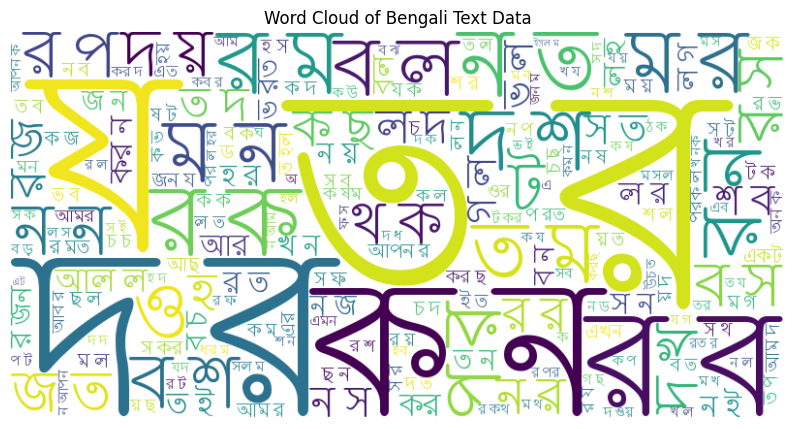

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from bidi.algorithm import get_display
from indicnlp.tokenize import indic_tokenize
from arabic_reshaper import reshape

all_text = ' '.join(df['Description'])


bengali_font_path = "/content/drive/MyDrive/Cyber Bulling_nlp/Hoogli.ttf"  # Replace with the actual font path
bengali_stopwords = set(["এই", "এক", "এবং"])


reshaped_text = reshape(all_text)

tokens = indic_tokenize.trivial_tokenize(reshaped_text)
processed_text = ' '.join(tokens)

# wordcloud = WordCloud(
#     width=800,
#     height=400,
#     background_color='white',
#     font_path=bengali_font_path,
#     stopwords=bengali_stopwords,
# ).generate


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=bengali_font_path,
    stopwords=bengali_stopwords,
).generate(processed_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Bengali Text Data')
plt.axis('off')
plt.show()


In [14]:
tokens

['ওই',
 'হালার',
 'পুত',
 'এখন',
 'কি',
 'মদ',
 'খাওয়ার',
 'সময়',
 'রাতের',
 'বেলা',
 'মদ',
 'খাই',
 'দিনের',
 'বেলাও',
 'মাঝেমধ্যে',
 'খায়',
 'এখন',
 'ম',
 '*',
 '*',
 '*',
 'চ',
 '*',
 '*',
 '*',
 '*',
 'সময়',
 'safa',
 'কে',
 'একটু',
 'চুদাম',
 'যার',
 'ইচ্ছা',
 'আছে',
 'চুদার',
 'লাইনে',
 'দারা',
 'একজন',
 'একজন',
 'করে',
 'জাবি',
 'আপনার',
 'জন্ম',
 'প্রক্রিয়ার',
 'সময়',
 'আপনার',
 'মায়ের',
 'ভিতর',
 'কি',
 'আপনার',
 'বাবা',
 'হুমায়ুন',
 'কবিরের',
 'শুক্রাণু',
 'ঢুকে',
 'ছিল',
 'না',
 'অন্য',
 'কারো',
 '।',
 'তাইলে',
 'আপনি',
 'কেম্নে',
 'শিউর',
 'হইলেন',
 'উনিই',
 'আপনার',
 'বাবা',
 '।',
 'কারণ',
 'ওই',
 'কাজের',
 'সময়ে',
 'তো',
 'আপনি',
 'দেখেননি',
 '।',
 'আপনাকে',
 'জারজ',
 'বা',
 'জাউরা',
 'বললে',
 'কি',
 'ভুল',
 'হবে',
 '?',
 'পাক্নামি',
 'ছাইড়া',
 'দিয়া',
 'অভিনয়টা',
 'ভাল',
 'করে',
 'করেন',
 '।',
 'আমাগো',
 'আমজনতারে',
 'এইসব',
 'শুনাইয়েন',
 'না',
 '।',
 'ধজভংগ',
 'দের',
 'আর',
 'ভায়াগ্রা',
 'লাগবো',
 'না',
 '।',
 'ধংস',
 'হোক',
 'এই',
 'সব',
 'কুলখানকিরা',
 '।',
 'বোকা